# Aula 2 - Aprendizagem Não Supervisionada
### Base de dados: Github do Curso e no link (https://github.com/datawaybr/CDKS-0003-FUNDAMENTOS-DE-MACHINE-LEARNING-NAO-SUPERVISIONADO-KICKSTART)

### Exemplo
- Link: https://github.com/datawaybr/CDKS-0003-FUNDAMENTOS-DE-MACHINE-LEARNING-NAO-SUPERVISIONADO-KICKSTART (referência: https://www.kaggle.com/datasets/jacksondivakarr/phone-classification-dataset/data)
  
- Descrição: Uma coleção de características que caracterizam telefones celulares, incluindo potência da bateria, especificações da câmera, suporte de rede, memória, dimensões da tela e outros atributos. A coluna 'faixa_de_preço' categoriza os telefones em faixas de preço, tornando este conjunto de dados adequado para tarefas de classificação de telefones celulares e previsão de preço.

- Problema de Negócio: Sua empresa precisa de um sistema inteligente que defina qual será a faixa de preço para uma lista de novos produtos que serão lançados ao longo do ano.
  
- Objetivo: Imagine que você foi responsável por identificar se há realmente 4 grupos de produtos para serem especificados de modo diferente entre si.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# link do git
df = pd.read_csv("bases/phone/dataset1.csv")
# df.drop(columns=['faixa_de_preço'], axis=1, inplace=True)
df

,potência_da_bateria,bluetooth,velocidade_do_processador,dual_sim,megapixels_câmera_frontal,4G,memória_interna,profundidade_móvel,peso_do_dispositivo,núcleos_do_processador,...,altura_do_pixel,largura_do_pixel,RAM,altura_da_tela,largura_da_tela,tempo_de_conversação,3G,tela_touch,wi-fi,faixa_de_preço
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.columns

Index(['potência_da_bateria', 'bluetooth', 'velocidade_do_processador',
       'dual_sim', 'megapixels_câmera_frontal', '4G', 'memória_interna',
       'profundidade_móvel', 'peso_do_dispositivo', 'núcleos_do_processador',
       'megapixels_câmera_principal', 'altura_do_pixel', 'largura_do_pixel',
       'RAM', 'altura_da_tela', 'largura_da_tela', 'tempo_de_conversação',
       '3G', 'tela_touch', 'wi-fi', 'faixa_de_preço'],
      dtype='object')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='RAM', ylabel='potência_da_bateria'>

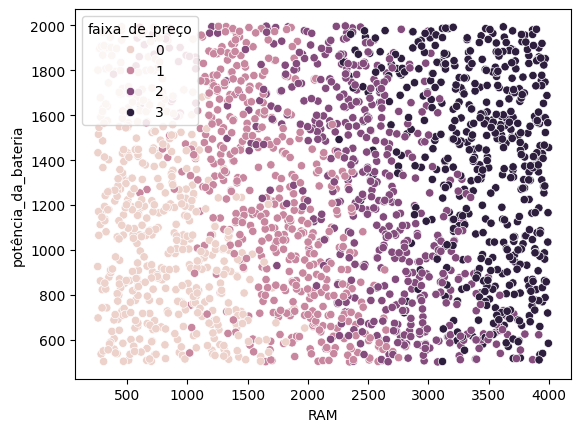

In [5]:
sns.scatterplot(data = df, x = 'RAM', y = 'potência_da_bateria', hue = 'faixa_de_preço')

<Axes: xlabel='RAM', ylabel='largura_do_pixel'>

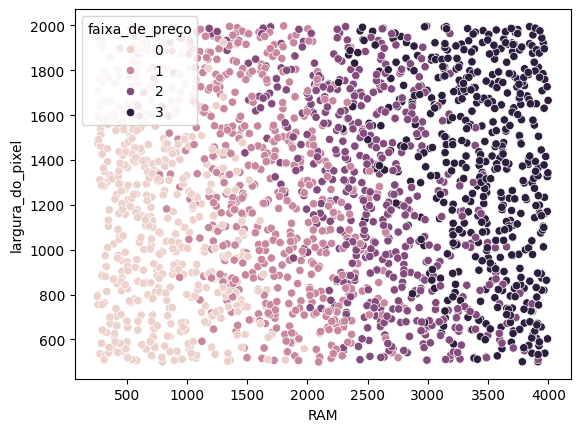

In [6]:
sns.scatterplot(data = df, x = 'RAM', y = 'largura_do_pixel', hue = 'faixa_de_preço')

<Axes: xlabel='largura_do_pixel', ylabel='RAM'>

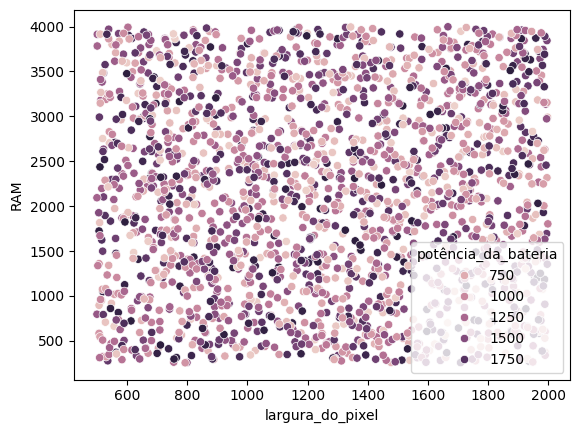

In [7]:
sns.scatterplot(data = df, x = 'largura_do_pixel', y = 'RAM', hue = 'potência_da_bateria')

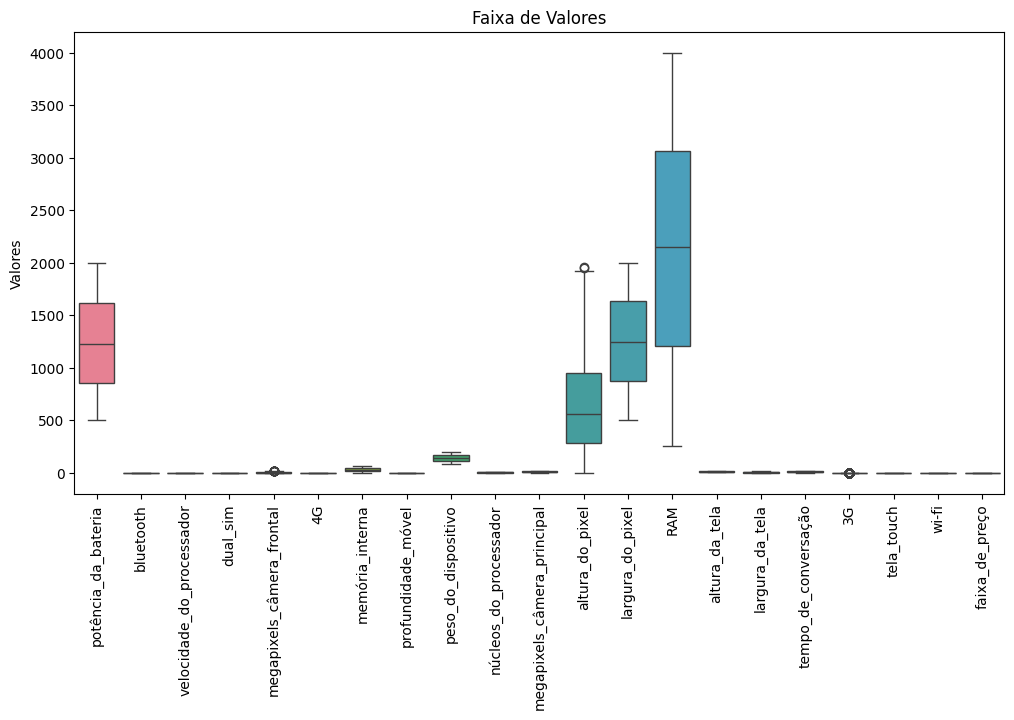

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.ylabel("Valores")
plt.title("Faixa de Valores")
plt.xticks(rotation=90)
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   potência_da_bateria          2000 non-null   int64  
 1   bluetooth                    2000 non-null   int64  
 2   velocidade_do_processador    2000 non-null   float64
 3   dual_sim                     2000 non-null   int64  
 4   megapixels_câmera_frontal    2000 non-null   int64  
 5   4G                           2000 non-null   int64  
 6   memória_interna              2000 non-null   int64  
 7   profundidade_móvel           2000 non-null   float64
 8   peso_do_dispositivo          2000 non-null   int64  
 9   núcleos_do_processador       2000 non-null   int64  
 10  megapixels_câmera_principal  2000 non-null   int64  
 11  altura_do_pixel              2000 non-null   int64  
 12  largura_do_pixel             2000 non-null   int64  
 13  RAM               

----
## Preprocessando os dados

In [10]:
X = df.drop(columns=['faixa_de_preço'], axis=1)
y = df['faixa_de_preço']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [12]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [13]:
X_train_norm

array([[2.02253616e-01, 3.14058411e-04, 4.08275934e-04, ...,
        3.14058411e-04, 0.00000000e+00, 3.14058411e-04],
       [5.16244221e-01, 0.00000000e+00, 5.54703676e-04, ...,
        3.69802451e-04, 3.69802451e-04, 3.69802451e-04],
       [2.21331962e-01, 0.00000000e+00, 1.18232886e-04, ...,
        2.36465772e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.46119254e-01, 0.00000000e+00, 9.55524939e-04, ...,
        0.00000000e+00, 3.67509592e-04, 0.00000000e+00],
       [4.23482606e-01, 2.33195267e-04, 3.73112428e-04, ...,
        0.00000000e+00, 0.00000000e+00, 2.33195267e-04],
       [4.24634690e-01, 3.76115757e-04, 1.05312412e-03, ...,
        3.76115757e-04, 3.76115757e-04, 3.76115757e-04]])

----
# Definir o melhor

In [14]:
#!pip install yellowbrick

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings 
warnings.filterwarnings('ignore')

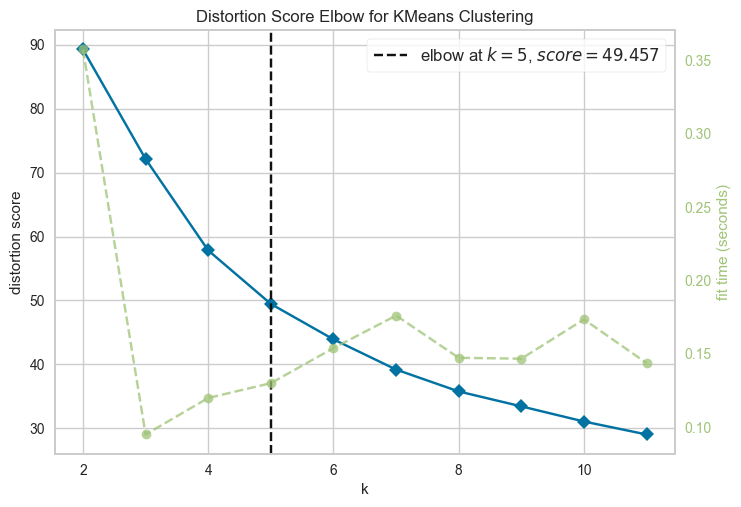

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X_train_norm)        
visualizer.show()

-------
## Implementação KMeans

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=5, n_init="auto", random_state=42)
kmeans.fit(X_train_norm)

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [19]:
kmeans.cluster_centers_

array([[3.40382557e-01, 1.64979320e-04, 5.38417850e-04, 1.62040368e-04,
        1.33747168e-03, 1.78904464e-04, 1.07099791e-02, 1.68401796e-04,
        4.71843701e-02, 1.62180864e-03, 3.26913318e-03, 3.10955146e-01,
        5.04811093e-01, 7.01352521e-01, 4.36860704e-03, 1.98647922e-03,
        3.63070244e-03, 2.60065287e-04, 1.70617725e-04, 1.68580491e-04],
       [7.10885954e-01, 2.23899564e-04, 7.43728616e-04, 2.36125573e-04,
        2.29928592e-03, 2.42497546e-04, 1.49311857e-02, 2.42159597e-04,
        6.78830010e-02, 2.06277085e-03, 4.81306511e-03, 2.10109506e-01,
        4.87907953e-01, 3.91769092e-01, 5.68331591e-03, 2.47077378e-03,
        5.18334641e-03, 3.52218300e-04, 2.61495407e-04, 2.06642019e-04],
       [2.85160371e-01, 1.47909659e-04, 4.30366692e-04, 1.53541043e-04,
        1.19999065e-03, 1.43866239e-04, 9.65583317e-03, 1.43781508e-04,
        3.98426938e-02, 1.34665565e-03, 2.69362663e-03, 1.26703046e-01,
        3.02838130e-01, 8.85724866e-01, 3.52402792e-03, 1.7241

----

In [20]:
## Verificando os valores dos centroides sem normalização

original_norms = np.linalg.norm(X_train, axis=0)

In [21]:
cluster_centers_ = (kmeans.cluster_centers_) * original_norms.reshape(1, -1)
cluster_centers_

array([[1.63788456e+04, 4.25441972e-03, 3.42629254e-02, 4.22238771e-03,
        3.02043632e-01, 4.69262009e-03, 1.44686308e+01, 3.58205306e-03,
        2.47768627e+02, 3.02235691e-01, 1.37944250e+00, 8.93967771e+03,
        2.44582153e+04, 6.13496935e+04, 2.08302404e+00, 5.26772939e-01,
        1.62249345e+00, 8.26500413e-03, 4.42620657e-03, 4.31447508e-03],
       [3.42070738e+04, 5.77383104e-03, 4.73281451e-02, 6.15287246e-03,
        5.19251868e-01, 6.36065100e-03, 2.01712638e+01, 5.15094582e-03,
        3.56458673e+02, 3.84412167e-01, 2.03091957e+00, 6.04045726e+03,
        2.36392542e+04, 3.42693767e+04, 2.70989895e+00, 6.55197777e-01,
        2.31634118e+00, 1.11936727e-02, 6.78377753e-03, 5.28858253e-03],
       [1.37216129e+04, 3.81423422e-03, 2.73869484e-02, 4.00091546e-03,
        2.70996044e-01, 3.77357607e-03, 1.30445339e+01, 3.05835806e-03,
        2.09216941e+02, 2.50958955e-01, 1.13660192e+00, 3.64259737e+03,
        1.46725781e+04, 7.74773704e+04, 1.68031475e+00, 4.5721

---
## Avaliação

In [22]:
from yellowbrick.cluster import InterclusterDistance

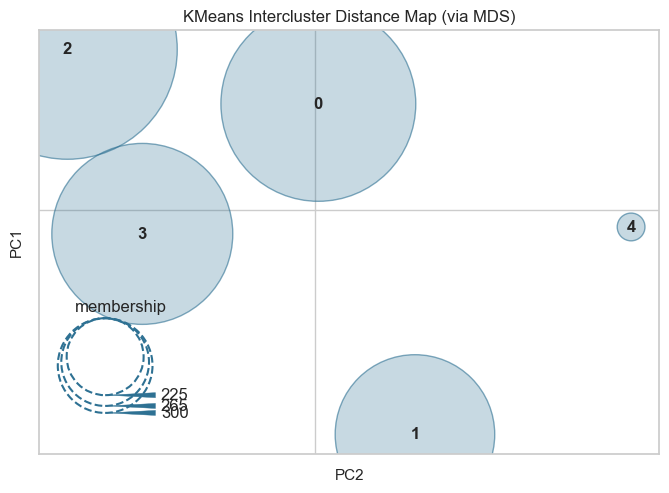

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [23]:
visualizer = InterclusterDistance(kmeans)

visualizer.fit(X_train_norm)
visualizer.show() 

In [24]:
from yellowbrick.cluster import SilhouetteVisualizer

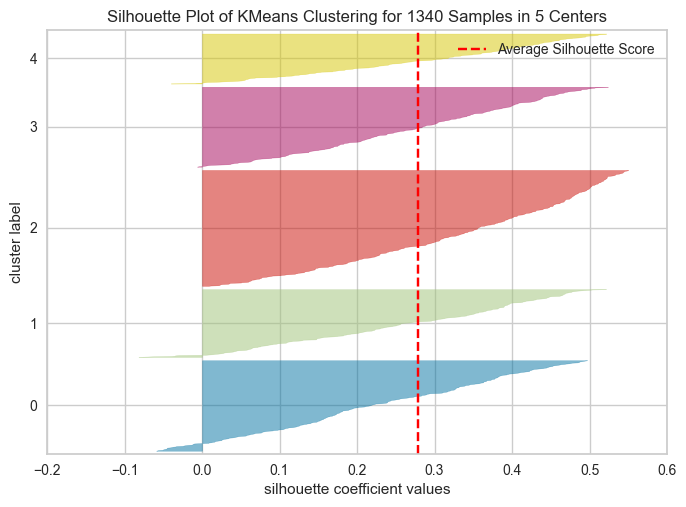

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(X_train_norm) 
visualizer.show()  

For k=2, Silhouette Score: 0.4275
For k=3, Silhouette Score: 0.3856
For k=4, Silhouette Score: 0.3001
For k=5, Silhouette Score: 0.2782
For k=6, Silhouette Score: 0.2883
For k=7, Silhouette Score: 0.2801
For k=8, Silhouette Score: 0.2655
For k=9, Silhouette Score: 0.2704


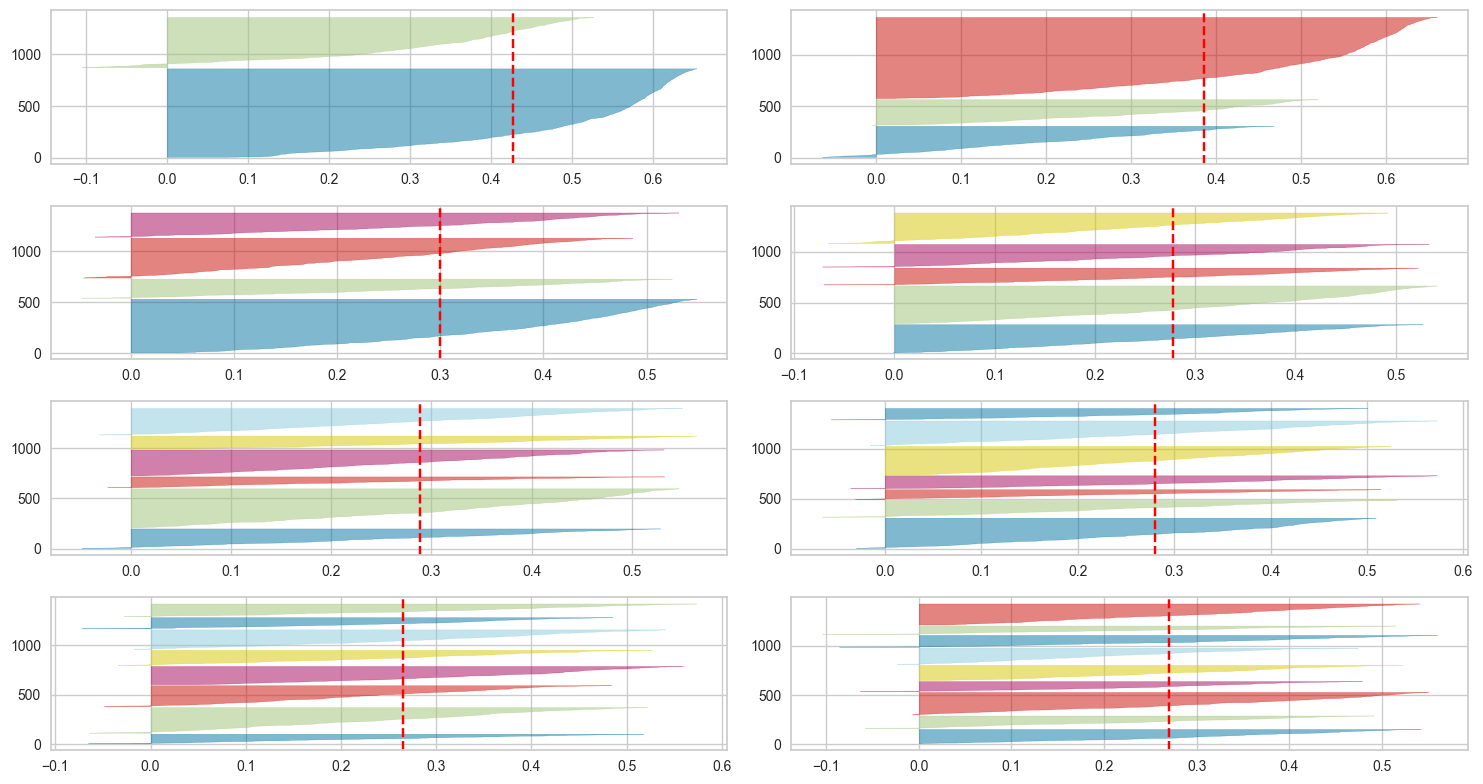

In [26]:
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

selected_variables = X.columns
k_values = range(2, 10)  
fig, ax = plt.subplots(math.floor(max(k_values) / 2), 2, figsize=(15, 8))

for i, k in enumerate(k_values, 1):
    kmeans_ = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    visualizer = SilhouetteVisualizer(kmeans_, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_train_norm)  # Fit the model and visualize the silhouette scores
    
    silhouette_score = visualizer.silhouette_score_
    print(f'For k={k}, Silhouette Score: {silhouette_score:.4f}')

plt.tight_layout()
plt.show()

-----
## Novos dados

In [27]:
kmeans.predict(X_test_norm)

array([3, 1, 0, 1, 4, 1, 2, 1, 1, 3, 3, 0, 3, 4, 2, 0, 3, 3, 4, 1, 3, 3,
       0, 3, 2, 4, 0, 4, 3, 0, 0, 2, 2, 1, 1, 3, 2, 0, 2, 2, 3, 2, 3, 2,
       4, 3, 0, 2, 0, 3, 1, 1, 4, 0, 0, 2, 4, 3, 1, 0, 2, 1, 0, 1, 1, 3,
       3, 2, 1, 0, 2, 2, 3, 3, 2, 3, 0, 1, 4, 3, 1, 2, 2, 2, 3, 1, 3, 2,
       3, 0, 2, 2, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 2, 0, 2, 4, 2, 0, 2, 2,
       2, 4, 4, 0, 0, 1, 4, 2, 0, 2, 2, 2, 2, 0, 0, 3, 3, 2, 0, 2, 4, 1,
       4, 1, 0, 4, 2, 1, 2, 0, 3, 2, 1, 3, 3, 4, 4, 0, 2, 3, 2, 3, 0, 2,
       0, 0, 1, 1, 0, 4, 1, 4, 0, 0, 3, 1, 1, 3, 4, 3, 1, 0, 3, 3, 3, 3,
       4, 2, 4, 2, 1, 2, 0, 0, 4, 3, 4, 1, 0, 2, 2, 2, 4, 4, 1, 0, 2, 2,
       0, 2, 3, 4, 4, 0, 1, 0, 1, 2, 3, 0, 2, 3, 3, 2, 0, 0, 2, 1, 0, 2,
       0, 0, 4, 1, 0, 0, 3, 0, 2, 0, 0, 2, 0, 3, 3, 3, 1, 2, 1, 3, 2, 3,
       4, 1, 1, 1, 4, 2, 3, 3, 0, 2, 3, 2, 2, 2, 3, 3, 3, 3, 1, 0, 2, 3,
       4, 4, 4, 0, 0, 3, 1, 2, 3, 3, 1, 2, 2, 2, 2, 4, 1, 0, 0, 2, 2, 0,
       4, 2, 2, 4, 3, 0, 4, 3, 4, 0, 2, 0, 4, 0, 4,

In [28]:
# Dados fornecidos
dados = {
    'potência_da_bateria': [574.0],
    'bluetooth': [0.0],
    'velocidade_do_processador': [2.8],
    'dual_sim': [1.0],
    'megapixels_câmera_frontal': [16.0],
    '4G': [0.0],
    'memória_interna': [38.0],
    'profundidade_móvel': [0.1],
    'peso_do_dispositivo': [90.0],
    'núcleos_do_processador': [6.0],
    'megapixels_câmera_principal': [17.0],
    'altura_do_pixel': [286.0],
    'largura_do_pixel': [1171.0],
    'RAM': [3269.0],ßs
    'altura_da_tela': [8.0],
    'largura_da_tela': [7.0],
    'tempo_de_conversação': [10.0],
    '3G': [0.0],
    'tela_touch': [1.0],
    'wi-fi': [0.0]
}

novo_dado = pd.DataFrame(dados)

In [29]:
novo_dado_norm = preprocessing.normalize(novo_dado, axis=1, norm='l2', copy=True, return_norm=False)
novo_dado_norm

array([[1.62486820e-01, 0.00000000e+00, 7.92618635e-04, 2.83078084e-04,
        4.52924934e-03, 0.00000000e+00, 1.07569672e-02, 2.83078084e-05,
        2.54770275e-02, 1.69846850e-03, 4.81232743e-03, 8.09603320e-02,
        3.31484436e-01, 9.25382256e-01, 2.26462467e-03, 1.98154659e-03,
        2.83078084e-03, 0.00000000e+00, 2.83078084e-04, 0.00000000e+00]])

In [30]:
kmeans.predict(novo_dado_norm)

array([2], dtype=int32)

-------